## Week 2 Homework - Linear Regression - Jon Workman 

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

### Dataset

Fuel efficiencies of popular American, Japanese and European motor cars of the 70's and 80's.

In [2]:
# read data into DataFrame
data = pd.read_csv('car_mpg.csv')
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  model_year  \
0   18          8           307       130.0    3504          12.0          70   
1   15          8           350       165.0    3693          11.5          70   
2   18          8           318       150.0    3436          11.0          70   
3   16          8           304       150.0    3433          12.0          70   
4   17          8           302       140.0    3449          10.5          70   

   origin                        model  
0       1  "chevrolet chevelle malibu"  
1       1          "buick skylark 320"  
2       1         "plymouth satellite"  
3       1              "amc rebel sst"  
4       1                "ford torino"

In [3]:
data.shape

(398, 9)

In [4]:
data.dtypes

mpg               int64
cylinders         int64
displacement      int64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
model            object
dtype: object

### Features of the dataset 


- Cylinders: Number of cylinders of the vehicles engine
- Displacement: Volume of all the cylinders, measured in cubic inches
- Horsepower: Total energy / power developed by the engine
- Weight: Total weight of the vehicle measured in pounds
- Acceleration: Ability of the vehicle to gain speed with respect to time
- Model_Year: Year the vehicle was manufactured
- Origin: Location where the vehicle was manufactured
- Model: Make and model of vehicle


### Response of the dataset 

- MPG: Miles Per Gallon, distance the vehicle travels in miles (1.61 km) for every gallon (3.78 litres) of fuel consumed

In [5]:
data.shape

(398, 9)

In [6]:
# Are there any null values?
data.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
model           0
dtype: int64

In [7]:
#Summarise the data
data.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.562814    5.454774    193.427136  104.469388  2970.424623   
std      7.812979    1.701004    104.268683   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     18.000000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     47.000000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [8]:
data.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.774601     -0.803371   -0.777683 -0.830954   
cylinders    -0.774601   1.000000      0.950722    0.842983  0.896017   
displacement -0.803371   0.950722      1.000000    0.897259  0.932822   
horsepower   -0.777683   0.842983      0.897259    1.000000  0.864538   
weight       -0.830954   0.896017      0.932822    0.864538  1.000000   
acceleration  0.417803  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.581627  -0.348746     -0.370181   -0.416361 -0.306564   
origin        0.561818  -0.562543     -0.609425   -0.455171 -0.581024   

              acceleration  model_year    origin  
mpg               0.417803    0.581627  0.561818  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370181 -0.609425  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.288137  0.205873  
model_year        0.288137    1.000000  0.180662  
origin            0.205873    0.180662  1.000000

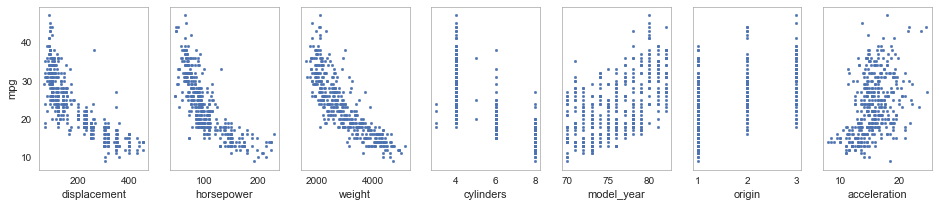

In [10]:
# Relationship between the features and the response using scatterplots

fig, axs = plt.subplots(1,7, sharey=True)
ax = data.plot(kind='scatter', x='displacement', y='mpg', ax=axs[0], figsize=(16, 3), s=7)
ax.set_facecolor("white")
bx = data.plot(kind='scatter', x='horsepower', y='mpg', ax=axs[1], s=7)
bx.set_facecolor("white")
cx = data.plot(kind='scatter', x='weight', y='mpg', ax=axs[2],s=7)
cx.set_facecolor("white")
dx = data.plot(kind='scatter', x='cylinders', y='mpg', ax=axs[3],s=7)
dx.set_facecolor("white")
ex = data.plot(kind='scatter', x='model_year', y='mpg', ax=axs[4],s=7)
ex.set_facecolor("white")
fx = data.plot(kind='scatter', x='origin', y='mpg', ax=axs[5],s=7)
fx.set_facecolor("white")
gx = data.plot(kind='scatter', x='acceleration', y='mpg', ax=axs[6],s=7)
gx.set_facecolor("white")
plt.rcParams["axes.edgecolor"] = "grey"
plt.rcParams["axes.linewidth"] = 0.5

### Questions about the data

- Is there a relationship between an increase in mpg and the features of the dataset?
- How strong is this relationship?
- Which features contribute greatest to an increase in mpg?
- Given the features of the dataset can mpg be predicted?

In [17]:
# this is the standard import if you're using "formula notation" 
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='mpg ~ horsepower', data=data).fit()

# print the coefficients
lm.params

Intercept     39.955805
horsepower    -0.157591
dtype: float64

### Interpreting the model coefficients 

- A unit **increse** in displacement is associated with a **0.06** unit **decrease** in mpg.

### Using the model for prediction 

Let's say there is a new car that is being developed with horsepower of 150. What would be the predicted mpg?

y = 39.96 - (0.15 * 150)

In [18]:
# manually calculate mpg
39.96 - (0.15 * 150)

17.46

Thus, we would predict the car would achieve 17.46 miles per gallon.

### Plotting least squares line

In [19]:
#create DataFrame with minimum and maximum values of horsepower.
X_new = pd.DataFrame({'horsepower': [data.horsepower.min(), data.horsepower.max()]})
X_new.head()

horsepower
0        46.0
1       230.0

In [20]:
#create predictions for x values.
preds = lm.predict(X_new)
preds

0    32.706609
1     3.709824
dtype: float64

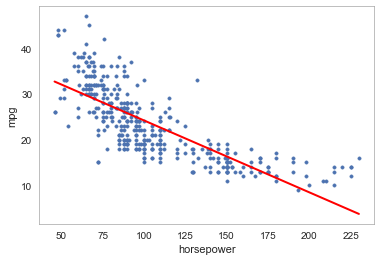

In [21]:
# plot the observed data
ax = data.plot(kind='scatter', x='horsepower', y='mpg', s=12)
ax.set_facecolor("white")
 
# plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
plt.rcParams["axes.edgecolor"] = "grey"
plt.rcParams["axes.linewidth"] = 0.5


In [22]:
# print the confidence intervals for the model coefficients
lm.conf_int()

0          1
Intercept   38.544006  41.367605
horsepower  -0.170274  -0.144909

### Hypothesis test and p-value 

**null hypothesis:** There is no relationship between horsepower and mpg (and thus $\beta_1$ equals zero)

In [23]:
lm.pvalues

Intercept     1.361336e-187
horsepower     1.246937e-80
dtype: float64

The p-value for horsepower is far less than 0.05, and so we **believe** there is a relationship between horsepower and mpg.

### R-squared 

In [24]:
# R-squared value for the model
lm.rsquared

0.6047909643396121

### Multiple Linear Regression

In [25]:
# create a fitted model with more features
lm = smf.ols(formula='mpg ~ horsepower + weight + cylinders + acceleration + model_year + origin', data=data).fit()

# print the coefficients
lm.params

Intercept      -18.251208
horsepower      -0.006841
weight          -0.005789
cylinders        0.073276
acceleration     0.041553
model_year       0.747532
origin           1.175313
dtype: float64

In [26]:
# Summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     289.2
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          3.03e-139
Time:                        22:23:49   Log-Likelihood:                -1026.6
No. Observations:                 392   AIC:                             2067.
Df Residuals:                     385   BIC:                             2095.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.2512      4.663     -3.914      0.000     -27.420      -9.083
horsepower      -0.0068      0.013     -0.516      0.606      -0.033       0.019
weight          -0.0058      0.001     -9.560      0.000      -0.007      -0.005
cylinders        0.0733      0.243      0.301      0.764      -0.405       0.552
acceleration     0.0416      0.099      0.420      0.675      -0.153       0.236
model_year       0.7475      0.051     14.601      0.000       0.647       0.848
origin           1.1753      0.266      4.426      0.000       0.653       1.697
==============================================================================
Omnibus:                       35.406   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.237
Skew:                           0.554   Prob(JB):                     1.85e-14
Kurtosis:                       4.626   Cond. No.                     8.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Learnings from this output 

- Surprised that weight, model_year and origin have significant p-values, where other features do not.
- This model has a higher adj. R-squared (0.816) than the previous model, which means that this model provides a better fit to the data than a model that only includes horsepower.

### Feature selection 

- Trying different models, with only keeping predictors in the model if they have small p-values.

In [27]:
# create a fitted model with more features
lm = smf.ols(formula='mpg ~ weight + model_year + origin', data=data).fit()

# print the coefficients
lm.params

Intercept    -18.269815
weight        -0.006015
model_year     0.761648
origin         1.148488
dtype: float64

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     588.8
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          3.67e-145
Time:                        22:23:52   Log-Likelihood:                -1043.8
No. Observations:                 398   AIC:                             2096.
Df Residuals:                     394   BIC:                             2112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.2698      3.953     -4.621      0.000     -26.042     -10.497
weight        -0.0060      0.000    -23.868      0.000      -0.007      -0.006
model_year     0.7616      0.048     15.948      0.000       0.668       0.856
origin         1.1485      0.258      4.460      0.000       0.642       1.655
==============================================================================
Omnibus:                       37.363   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.548
Skew:                           0.555   Prob(JB):                     4.79e-16
Kurtosis:                       4.738   Cond. No.                     7.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With weight, model_year and origin features, the model maintained the same adj. **R-squared (0.816).**